In [1]:
import pandas as pd

ts_raw = pd.read_csv("./data/analysis_data_test.csv",header=0,skiprows=0)


NameError: name 'LR_raw' is not defined

In [2]:
ts_raw.head(10)

,marketing_source,shopper_creation_timestamp_pst,shopper_id,number_calls_answered,number_calls_longer_than_200seconds,partner_revenue,marketing_cost,policies_submitted,policy_value
0,AH,2018-05-01 6:22,4611274,0,0,0.00,0.00,0,0.0
1,AJ,2018-05-03 4:24,4657039,1,0,3.69,0.00,0,0.0
2,BG,2018-05-06 16:38,4717844,0,0,9.60,4.00,0,0.0
3,BD,2018-05-10 21:39,4812602,0,0,0.00,0.00,0,0.0
4,Unknown,2018-05-21 9:05,5000656,0,0,0.00,0.00,0,0.0
5,U,2018-05-26 3:24,5107487,2,0,2.08,7.40,0,0.0
6,O,2018-05-27 10:23,5123237,2,0,0.00,5.63,0,0.0
7,AH,2018-05-31 1:35,5198174,1,0,0.00,0.00,0,0.0
8,O,2018-06-01 16:25,5236467,4,0,0.00,8.04,0,0.0
9,AO,2018-06-13 12:43,5466320,1,0,27.31,18.38,0,0.0


In [4]:
ts_raw.shape

(1048575, 9)

In [137]:
ts_raw['marketing_source'].value_counts().head(40)

U          267024
Unknown    140791
BI         107581
AH          99377
O           80049
AW          46535
BG          34348
BD          30867
S           24443
AJ          23186
AI          18347
AK          15357
R           14954
AM          14682
W           11235
Q           11195
N            9798
AQ           8636
BH           8111
AE           6795
AN           6347
AZ           6299
AR           4922
AL           4319
L            3834
BB           3721
AG           3536
BC           3497
F            3261
AV           2753
AC           2745
AF           2724
Y            2660
AD           2513
BE           2211
Z            1952
AY           1947
B            1540
AX           1384
C            1217
Name: marketing_source, dtype: int64

In [134]:
ts_raw['marketing_source'].nunique()

62

In [7]:
ts_raw['shopper_id'].nunique()

1048575

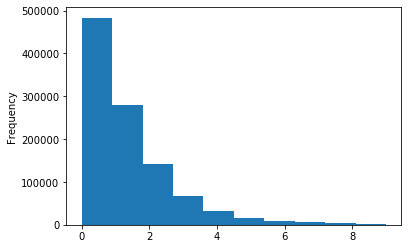

In [16]:
ts_raw['number_calls_answered'][ts_raw.number_calls_answered < 10].plot.hist()

In [14]:
ts_raw['number_calls_answered'][ts_raw.number_calls_answered > 100]

7510         133
17028       1136
154263       121
385150       282
430360       112
461339       278
503382       228
527732       103
618798       326
705191       105
713568       130
744391       738
751323       783
787549       120
825730       423
839874       101
848268       198
865787       121
927452       233
954954       113
968954     78414
989677       122
998700       104
1025824      171
Name: number_calls_answered, dtype: int64

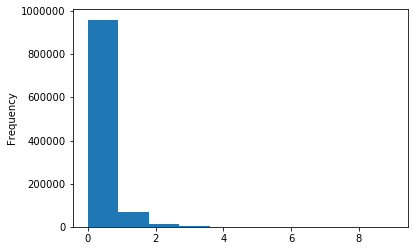

In [18]:
ts_raw['number_calls_longer_than_200seconds'][ts_raw.number_calls_longer_than_200seconds < 10].plot.hist()

In [19]:
ts_raw['number_calls_longer_than_200seconds'][ts_raw.number_calls_longer_than_200seconds > 10]

17028        648
38391         11
96713         12
220733        11
238886        11
292233        13
322267        13
353502        11
382561        11
399605        11
411376        13
421671        11
430360        42
443821        13
459242        17
461339       128
511419        11
527732        29
536382        15
543917        11
554471        17
556595        16
569162        27
594699        15
618798        36
629494        25
642724        11
684347        15
707018        23
721474        20
747795        14
788102        12
802468        11
825730       258
834339        11
839569        28
851725        14
856025        12
880282        17
898841        13
913521        12
917326        11
927452       151
954954        49
968954     42917
1000901       13
1031837       11
1045195       15
Name: number_calls_longer_than_200seconds, dtype: int64

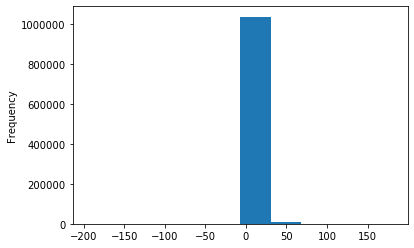

In [20]:
ts_raw['partner_revenue'].plot.hist()


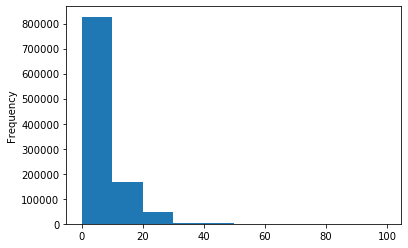

In [24]:
ts_raw['marketing_cost'][ts_raw.marketing_cost < 100].plot.hist()

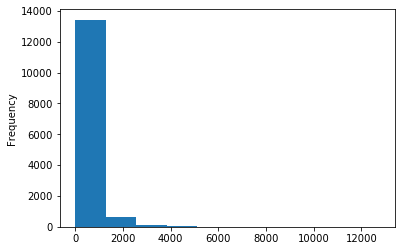

In [45]:
ts_raw['policy_value'][ts_raw.policy_value > 0].plot.hist()

In [52]:
ts_raw['conversion'] = ((ts_raw['policy_value'] > 0).astype(int))


In [54]:
ts_raw['conversion'].value_counts()

0    1034383
1      14192
Name: conversion, dtype: int64

### Timestamps

In [26]:
ts_raw['create_timestamp']=pd.to_datetime(ts_raw['shopper_creation_timestamp_pst'],infer_datetime_format=True)

In [27]:
ts_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   marketing_source                     1048575 non-null  object        
 1   shopper_creation_timestamp_pst       1048575 non-null  object        
 2   shopper_id                           1048575 non-null  int64         
 3   number_calls_answered                1048575 non-null  int64         
 4   number_calls_longer_than_200seconds  1048575 non-null  int64         
 5   partner_revenue                      1048575 non-null  float64       
 6   marketing_cost                       1048575 non-null  float64       
 7   policies_submitted                   1048575 non-null  int64         
 8   policy_value                         1048575 non-null  float64       
 9   create_timestamp                     1048575 non-null  da

In [28]:
ts_raw['create_timestamp'].head()

0   2018-05-01 06:22:00
1   2018-05-03 04:24:00
2   2018-05-06 16:38:00
3   2018-05-10 21:39:00
4   2018-05-21 09:05:00
Name: create_timestamp, dtype: datetime64[ns]

In [34]:
ts_raw['create_date']=ts_raw.create_timestamp.dt.date

In [35]:
ts_raw['create_date'].value_counts()

2018-06-25    30305
2018-08-30    17044
2018-07-31    14683
2018-08-29    13761
2018-07-30    13434
              ...  
2018-06-09     3989
2018-05-13     3894
2018-06-03     3876
2018-06-16     3802
2018-06-17     3582
Name: create_date, Length: 123, dtype: int64

In [ ]:
# group by date
# calculate the ROI
# make some plots

In [87]:
ts_date = ts_raw.groupby(by="create_date")[["partner_revenue","marketing_cost","policy_value","conversion"]].sum()

# .reset_index() # not going to reset index so that the graphs use dates

In [96]:
# this is necessary for using select mask later
ts_date['date'] = pd.to_datetime(ts_date.index)

In [97]:
ts_date.head()

,partner_revenue,marketing_cost,policy_value,conversion,date
create_date,,,,,
2018-05-01,14319.65,63269.88,54870.820,106,2018-05-01
2018-05-02,12131.89,58123.87,56214.059,137,2018-05-02
2018-05-03,11382.37,43537.48,62104.817,126,2018-05-03
2018-05-04,8786.04,34891.92,47860.916,100,2018-05-04
2018-05-05,11464.94,32728.86,43260.264,97,2018-05-05


In [ ]:
ts_date['total_revenue'] = ts_date['policy_value']+ts_date['partner_revenue']

In [124]:
# vpc = value per conversion
ts_date['rpc'] = (ts_date['policy_value']+ts_date['partner_revenue'])/ts_date['conversion']

In [132]:
ts_date['rpc_ma'] = ts_date['vpc'].rolling(window=7).mean()

In [115]:
ts_date['roi']=(ts_date['policy_value']+ts_date['partner_revenue'])/ts_date['marketing_cost']

In [118]:
ts_date['roi_ma'] = ts_date['roi'].rolling(window=7).mean()

In [122]:
ts_date['caq']=ts_date['marketing_cost']/ts_date['conversion']

In [129]:
ts_date['caq_ma'] = ts_date['caq'].rolling(window=7).mean()

In [133]:
ts_date.tail()

,partner_revenue,marketing_cost,policy_value,conversion,date,roi,caq,roi_ma,vpc,vpc_ma,caq_ma
create_date,,,,,,,,,,,
2018-08-27,28672.80,69590.89,79313.566,162,2018-08-27,1.551731,429.573395,1.665282,666.582506,634.365784,385.187866
2018-08-28,28597.41,69845.48,66303.795,167,2018-08-28,1.358731,418.236407,1.629862,568.270689,618.768651,384.700607
2018-08-29,29805.83,75748.39,80033.468,183,2018-08-29,1.450055,413.925628,1.599549,600.214743,621.117594,393.661997
2018-08-30,41964.81,107741.44,81534.772,190,2018-08-30,1.146259,567.060211,1.554685,649.997800,618.987834,409.624969
2018-08-31,27262.52,80314.19,65333.061,145,2018-08-31,1.152917,553.890966,1.480234,638.590214,613.317651,430.871041


In [72]:
ts_date.size

492

In [131]:
ts_date.to_csv("./data/traffic_days.csv")

### TODO next

- [ ] start document 
- [ ] summarize the symptoms
- [ ] clean the data -- outliers + missing
- [ ] pivot to channels -- 62 different channels -- top 10?

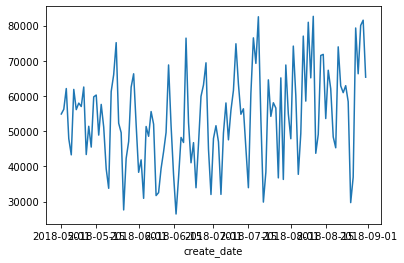

In [114]:
ts_date['policy_value'].plot()

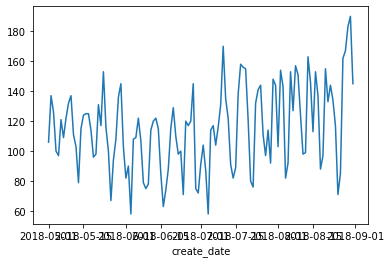

In [57]:
ts_date['conversion'].plot()

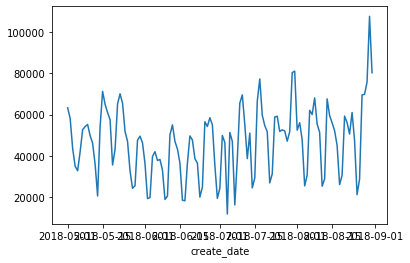

In [39]:
ts_date['marketing_cost'].plot()

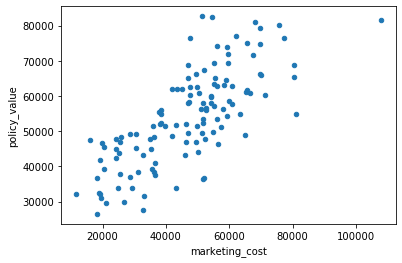

In [49]:
ts_date.plot.scatter(x='marketing_cost',y='policy_value')

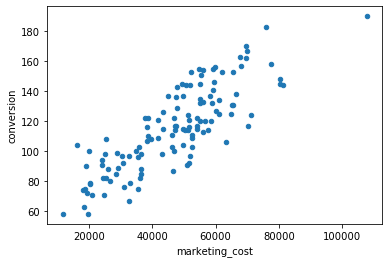

In [58]:
ts_date.plot.scatter(x='marketing_cost',y='conversion')

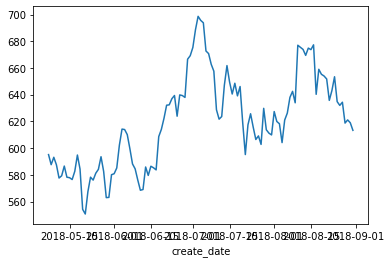

In [127]:
ts_date['vpc_ma'].plot()

In [111]:
ts_date.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 2018-05-01 to 2018-08-31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   partner_revenue  123 non-null    float64       
 1   marketing_cost   123 non-null    float64       
 2   policy_value     123 non-null    float64       
 3   conversion       123 non-null    int64         
 4   date             123 non-null    datetime64[ns]
 5   roi              123 non-null    float64       
 6   caq              123 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.7+ KB


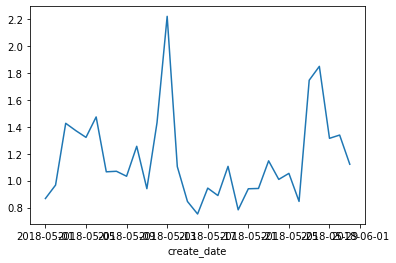

In [113]:
from datetime import datetime

start_date = datetime.strptime('05-01-2018', '%m-%d-%Y') 
end_date = datetime.strptime('06-01-2018', '%m-%d-%Y') 

mask = (ts_date['date'] >= start_date) & (ts_date['date'] < end_date)
    
ts_date.loc[mask]['roi'].plot()

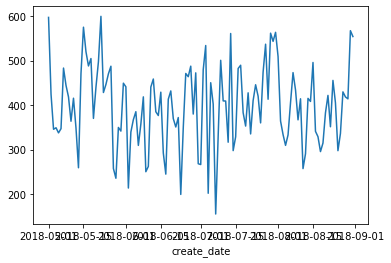

In [123]:
ts_date['caq'].plot()

#### need to spread out the x-axis to see what happened in summer 2918

Create hypotheses:
1.  based on data
2.  based on intuition